# Microscopie hyperspectrale

Quentin Douzery  
Alexia Ghozland

## 1. Imports

### 1.1. Packages

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import h5py
import os
from tqdm import tqdm
import cv2
import copy

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 1.2. Images

In [ ]:
#Dictionnaire qui contient les fichiers des images après segmentation Ilastik
path_dir = "/content/gdrive/My Drive/Hyperspectral/Images-hyperspectrales"

segmented_images_names = {"j5_1_740nm":os.path.join(path_dir, "j5-740nm/segmented-images/j5_1_740nm_Simple-Segmentation.h5"),
                          "v6_3_740nm":os.path.join(path_dir, "v6-740nm/segmented-images/v6_3_740nm_Simple-Segmentation.h5")}

In [ ]:
#Dictionnaire qui contient les images après segmentation (format hdf5)
aux_segmented_images = {}
for name, path in segmented_images_names.items():
    aux_segmented_images[name] = h5py.File(path, 'r')

In [ ]:
#Dictionnaire qui contient les images après segmentation (utilisables, tableau Python)
segmented_images = {}
for name, img in tqdm(aux_segmented_images.items()):
  z = img['exported_data'].shape[1]
  segmented_images[name] = np.reshape(img['exported_data'], (z,512,512))

100%|██████████| 2/2 [00:00<00:00, 71.19it/s]


## 2. Pré-traitement

In [ ]:
def Filter_muscle (img):
  z = img.shape[0]
  filter = img - 2*np.ones((z,512,512))
  filter = np.abs(filter)
  return filter

In [ ]:
for name, img in tqdm(segmented_images.items()):
  segmented_images[name] = Filter_muscle(img)

100%|██████████| 2/2 [00:00<00:00, 28.53it/s]


## 3. Affichage

In [ ]:
image_j = "j5_1_740nm"
image_v = "v6_3_740nm"

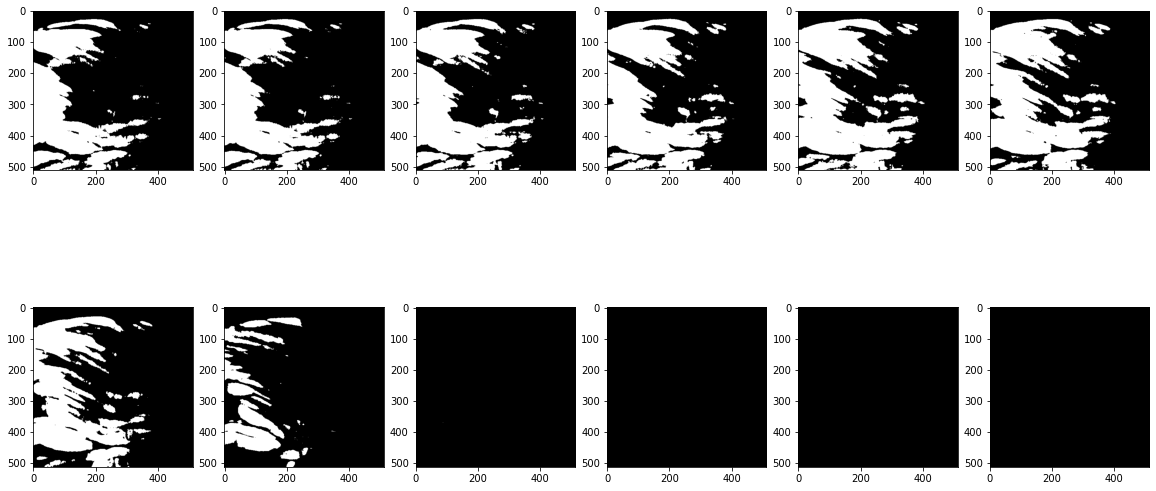

In [ ]:
z=0
fig, axs = plt.subplots(2,6, figsize=(20, 10))
for i in range(2):
  for j in range(6):
    Zi = segmented_images[image_j][z,:,:]
    axs[i,j].imshow(Zi, cmap='gray')
    z+=1

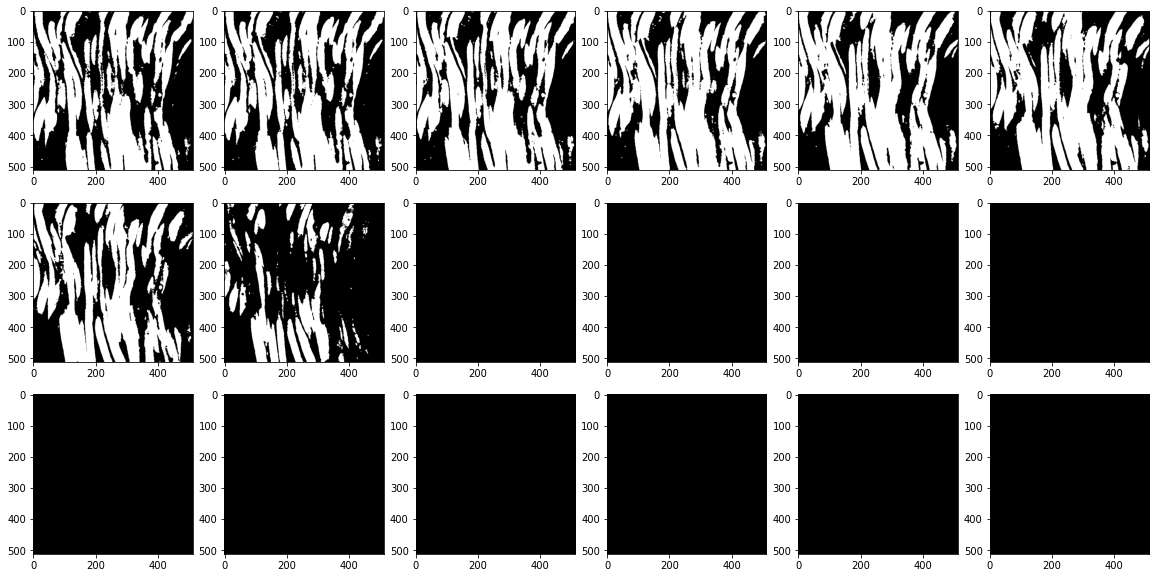

In [ ]:
z=0
fig, axs = plt.subplots(3,6, figsize=(20, 10))
for i in range(3):
  for j in range(6):
    Zi = segmented_images[image_v][z,:,:]
    axs[i,j].imshow(Zi, cmap='gray')
    z+=1

## 4. Ouverture

In [ ]:
##Création du dictionnaire qui va contenir les images après ouverture
open_segmented_images = copy.deepcopy(segmented_images)

In [ ]:
kernel=np.ones((20,20),np.uint8) #kernel rectangulaire
#kernel2=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) #kernel elliptique

In [ ]:
for name, img in open_segmented_images.items():
  for z in range(img.shape[0]):
    img[z,:,:] = cv2.morphologyEx(img[z,:,:], cv2.MORPH_OPEN, kernel)

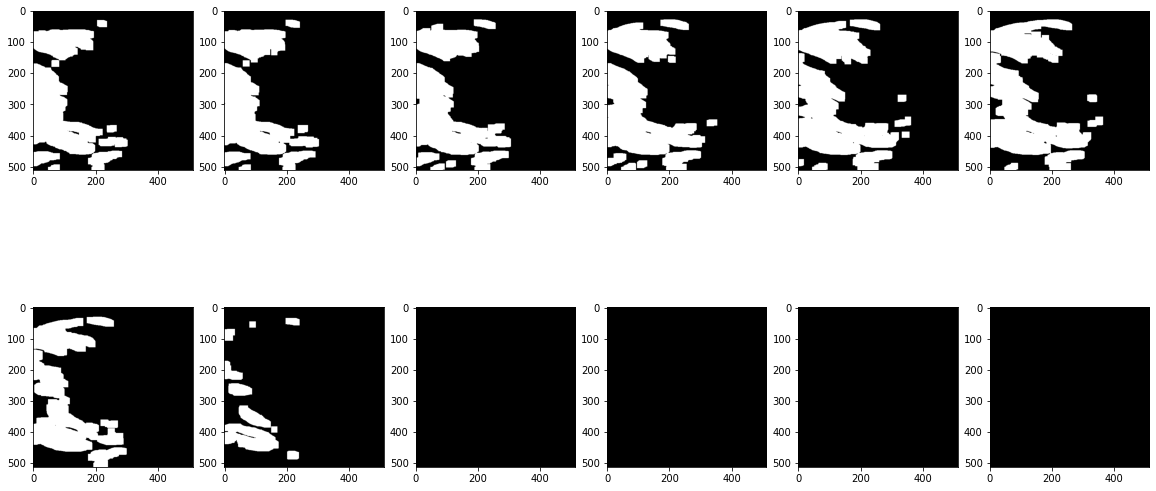

In [ ]:
z=0
fig, axs = plt.subplots(2,6, figsize=(20, 10))
for i in range(2):
  for j in range(6):
    Zi = open_segmented_images[image_j][z,:,:]
    axs[i,j].imshow(Zi, cmap='gray')
    z+=1

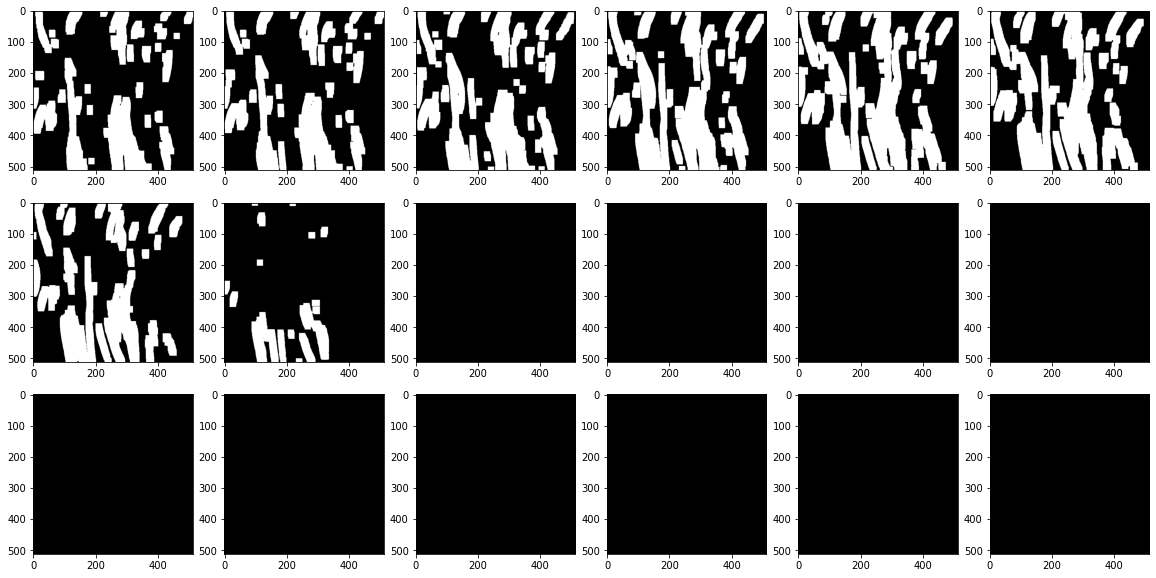

In [ ]:
z=0
fig, axs = plt.subplots(3,6, figsize=(20, 10))
for i in range(3):
  for j in range(6):
    Zi = open_segmented_images[image_v][z,:,:]
    axs[i,j].imshow(Zi, cmap='gray')
    z+=1

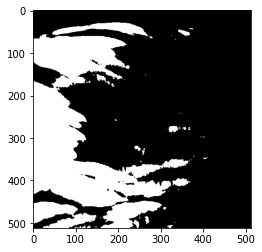

In [ ]:
plt.imshow(segmented_images[image_j][0,:,:],cmap="gray")
plt.show()

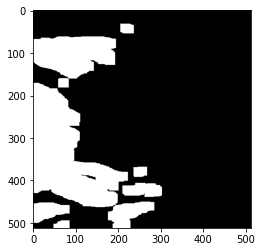

In [ ]:
plt.imshow(open_segmented_images[image_j][0,:,:],cmap='gray')
plt.show()